# Group 1

Fabio Ceruti - Fabio Martino - Alex Lucchini - Jacopo Biggiogera

This notebook contains the summarized results of the obtained clusters of families. More precisely, it compares four different types of clusters: clusters of standard images (standard clusters), clusters of masked images (context clusters), clusters of filled masked images (filled clusters), and clusters of only bboxes (bboxes clusters).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [37]:
context_clusters = pd.read_csv('family_context_predictions.csv')
standard_clusters = pd.read_csv('family_standard_predictions.csv')
filled_clusters = pd.read_csv('family_avg_contexts_predictions.csv')
bboxes_clusters = pd.read_csv('family_bbcontent_predictions.csv')

The function below builds the confusion matrix of a given cluster. More precisely, each column corresponds to the distribution of labels within each cluster. Ideally, each cluster would contain only one family, meaning one label with 100% of relative frequency. Thus, the function also computes a dispersion loss of the clusters: the sparser the labels within each cluster, the higher the loss (in absolute terms).

In [38]:
def confusion(preds):
    totals = preds.groupby('clusters').count().reset_index()['label']
    clusters = set(preds['clusters'])
    clusters = list(clusters)
    fractions = pd.DataFrame()
    for i in range(len(clusters)):
      col = []
      for j in set(preds['label']):
        fraction = len(preds.loc[(preds['clusters'] == clusters[i])&(preds['label'] == j), 'label'])*100/totals[i]
        col.append(fraction)
      fractions[f'Cluster {clusters[i]}'] = col

    disp = []
    for i in range(len(fractions.columns)):
      probs = fractions.loc[fractions[fractions.columns[i]] > 0, fractions.columns[i]]/100
      divg = np.log(np.prod(probs))
      disp.append(divg)

    print(f'Dispersion Loss: {np.mean(disp)}')
    return fractions

# Context Clusters

In [39]:
confusion(context_clusters) #Confusion matrix of context clusters

Dispersion Loss: -6.014328154652805


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,19.047619,0.000000,18.181818,51.612903,2.5,40.677966
1,47.619048,11.940299,15.584416,8.602151,95.0,6.779661
2,20.634921,31.343284,25.974026,30.107527,0.0,30.508475
3,12.698413,56.716418,40.259740,9.677419,2.5,22.033898


The idea for this code is that the label appearing with the highest frequency in a cluster is the one which is going to be "predicted" by such cluster. Thus, the code below builds a bar plot, showing each predicted label with its associated frequency in its corresponding cluster. Therefore, if a label does not appear in such bar plot, it's because it has never been predicted by a cluster.

Dispersion Loss: -6.014328154652805


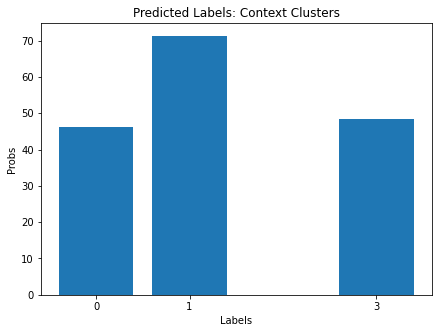

In [56]:
df = confusion(context_clusters)
context_max = []

for i in range(len(df.columns)):
    context_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df1 = pd.DataFrame()
df1['pred_labels'] = labels
df1['pred_probs'] = probs

df1 = df1.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df1 = df1.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(7, 5))
plt.bar(df1['pred_labels'], df1['pred_probs'])
plt.xticks(df1['pred_labels'])
plt.title('Predicted Labels: Context Clusters')
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()

As it's possible to see, using contexts only does not enable to identify label 2, and only label 1 (aves) is predicted with high purity. This is likely due to the nature of the images in the "aves" family: images of birds mostly have the sky as the context, which is expected to be different from the usual contexts of the remaining three families (reptilia, mammalia, and insecta).

The heatmap below provides an intuitive representation of the confusion matrix. The darker each square, the higher the probability associated with such label within a specific cluster.

Dispersion Loss: -6.014328154652805


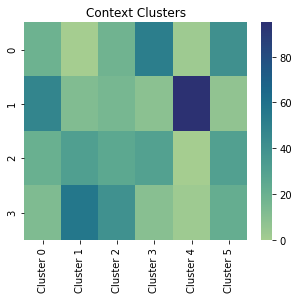

In [43]:
import seaborn as sb
plt.figure(figsize = (5,4))
sb.heatmap(confusion(context_clusters), cmap = 'crest')
plt.title('Context Clusters')
plt.show()

# Filled Clusters

In [6]:
confusion(filled_clusters) #Confusion matrix of filled clusters

Dispersion Loss: -7.931580587017746


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,12.637363,5.000000,21.875000,31.730769,71.028037,40.425532,1.315789
1,12.637363,21.428571,71.875000,4.807692,6.542056,2.127660,84.210526
2,51.098901,11.428571,5.208333,24.038462,15.887850,45.744681,1.315789
3,23.626374,62.142857,1.041667,39.423077,6.542056,11.702128,13.157895


Dispersion Loss: -7.931580587017746


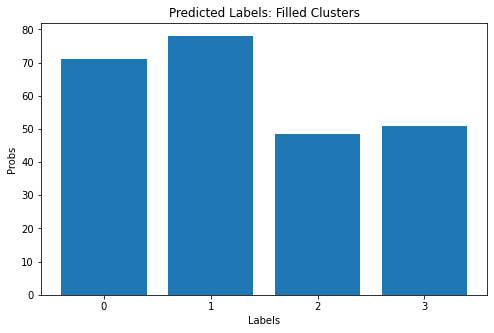

In [57]:
df = confusion(filled_clusters)
filled_max = []

for i in range(len(df.columns)):
    filled_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df2 = pd.DataFrame()
df2['pred_labels'] = labels
df2['pred_probs'] = probs

df2 = df2.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df2 = df2.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(df2['pred_labels'], df2['pred_probs'])
plt.xticks(df2['pred_labels'])
plt.title('Predicted Labels: Filled Clusters')
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()
plt.show()

As it's possible to see, by using filled contexts, overall the performance increases: despite the higher dispersion loss, label 2 is now identified, and the purity associated with label 0 (insecta) significantly increases. Thus, it seems that contexts appear to be more relevant for the families of "aves" and "insecta".

Dispersion Loss: -7.931580587017746


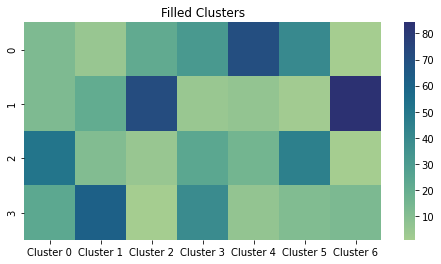

In [46]:
import seaborn as sb
plt.figure(figsize = (8,4))
sb.heatmap(confusion(filled_clusters), cmap = 'crest')
plt.title('Filled Clusters')
plt.show()

# Standard Clusters

In [58]:
confusion(standard_clusters) #Confusion matrix of standard clusters

Dispersion Loss: -3.584200789404806


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
0,100.0,5.208333,55.555556,41.428571,0.0,0.0,90.598291,0.0,0.0,0.0,0.0,3.508772
1,0.0,10.416667,2.777778,48.571429,0.0,100.0,5.128205,0.0,0.0,0.0,100.0,3.508772
2,0.0,58.333333,18.055556,10.000000,0.0,0.0,2.564103,0.0,100.0,2.5,0.0,89.473684
3,0.0,26.041667,23.611111,0.000000,100.0,0.0,1.709402,100.0,0.0,97.5,0.0,3.508772


Dispersion Loss: -3.584200789404806


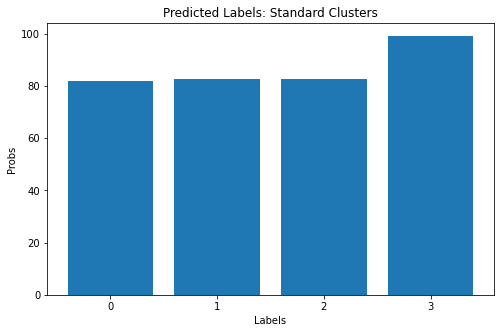

In [59]:
df = confusion(standard_clusters)
standard_max = []

for i in range(len(df.columns)):
    standard_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df3 = pd.DataFrame()
df3['pred_labels'] = labels
df3['pred_probs'] = probs

df3 = df3.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df3 = df3.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(df3['pred_labels'], df3['pred_probs'])
plt.xticks(df3['pred_labels'])
plt.title('Predicted Labels: Standard Clusters')
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()

As it's possible to see, overall the performance significantly increases when using the whole images: all the families are identified with very high purity.

Dispersion Loss: -3.584200789404806


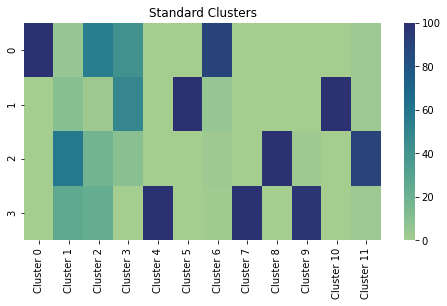

In [19]:
plt.figure(figsize = (8,4))
sb.heatmap(confusion(standard_clusters), cmap = 'crest')
plt.title('Standard Clusters')
plt.show()

# BBoxes Clusters

In [21]:
confusion(bboxes_clusters) #Confusion matrix of bboxes clusters

Dispersion Loss: -2.9311432939698645


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
0,100.0,4.6875,32.222222,0.0,0.0,0.000000,0.0,0.0,0.0,2.702703,97.87234,40.540541
1,0.0,90.6250,36.666667,0.0,0.0,0.000000,0.0,0.0,100.0,97.297297,2.12766,5.405405
2,0.0,3.1250,17.777778,0.0,0.0,98.484848,100.0,0.0,0.0,0.000000,0.00000,41.891892
3,0.0,1.5625,13.333333,100.0,100.0,1.515152,0.0,100.0,0.0,0.000000,0.00000,12.162162


Dispersion Loss: -2.9311432939698645


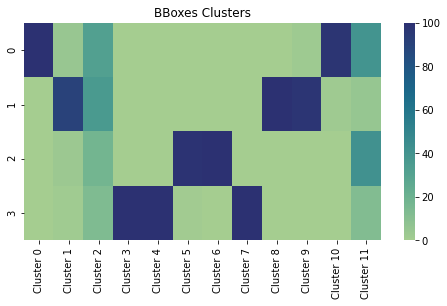

In [23]:
plt.figure(figsize = (8,4))
sb.heatmap(confusion(bboxes_clusters), cmap = 'crest')
plt.title('BBoxes Clusters')
plt.show()

Dispersion Loss: -2.9311432939698645


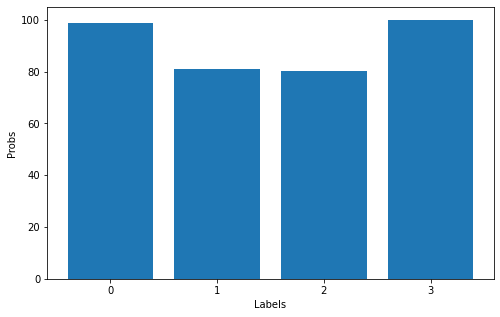

In [50]:
df = confusion(bboxes_clusters)
bboxes_max = []

for i in range(len(df.columns)):
    bboxes_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df4 = pd.DataFrame()
df4['pred_labels'] = labels
df4['pred_probs'] = probs

df4 = df4.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df4 = df4.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(df4['pred_labels'], df4['pred_probs'])
plt.xticks(df4['pred_labels'])
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()

Overall, the performance improves when using the bboxes only: the dispersion loss slightly decreases, and two families are predicted with 100% purity. Interestingly, now "aves" is predicted with less accuracy with respect to the others: while context-wise it's easier to identify, it seems that animals features-wise the opposite is true.

# Context Comparison

In [51]:
#Generation of a single dataframe with the predicted labels and their corrisponding probabilities of all four types of clusters.
comp = pd.merge(df1, df2, on = 'pred_labels', how = 'outer')
comp = comp.rename({'pred_probs_x':'context_probs', 'pred_probs_y':'filled_probs'}, axis = 1)
comp = pd.merge(comp, df3, on = 'pred_labels', how = 'outer')
comp = comp.rename({'pred_probs':'standard'}, axis = 1)
comp = pd.merge(comp, df4, on = 'pred_labels', how = 'outer')
comp = comp.rename({'pred_probs':'bboxes'}, axis = 1)
comp = comp.fillna(0)
comp = comp.sort_values('pred_labels')
comp

,pred_labels,context_probs,filled_probs,standard,bboxes
0,0,46.145435,71.028037,82.051282,98.936170
1,1,71.309524,78.042763,82.857143,81.147241
3,2,0.000000,48.421791,82.602339,80.125580
2,3,48.488079,50.782967,99.166667,100.000000


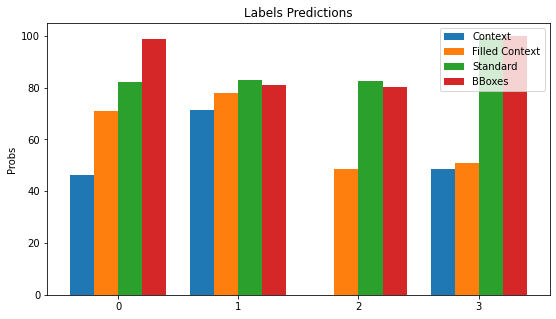

In [54]:
x = np.arange(4)
width = 0.2
plt.figure(figsize=(9, 5))
plt.bar(x - 0.3, comp['context_probs'], width, label = 'Context')
plt.bar(x - 0.1, comp['filled_probs'], width, label = 'Filled Context')
plt.bar(x + 0.1, comp['standard'], width, label = 'Standard')
plt.bar(x + 0.3, comp['bboxes'], width, label = 'BBoxes')
plt.xticks(comp['pred_labels'])
plt.ylabel('Probs')
plt.title('Labels Predictions')
plt.legend()
plt.show()

The plot bar above compares the predicted probabilities of each label by all four types of clusters. As it's possible to see, for three families there exists an increasing trend: when moving from clusters to bboxes, the purity associated with each prediction increases, suggesting that for family identification using only the bboxes may be the best approach. However, for label 1 (aves), the improvement is only marginal, suggesting that context only may be powerful enough for its identification among other families. 